In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime
import math

import xgboost
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
data = pd.read_csv("new_ecommerce_log.csv")

In [24]:
data.drop(['Unnamed: 0', 'index'],axis=1, inplace=True)

In [26]:
data['event_time']=pd.to_datetime(data['event_time'])

data.rename({'event_time':'time', 'event_type':'type'}, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9877482 entries, 0 to 9877481
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   time           datetime64[ns, UTC]
 1   type           object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 678.2+ MB


In [30]:
data['category_code'].value_counts()

category_code
electronics.smartphone          2649559
electronics.clocks               302898
computers.notebook               262638
electronics.video.tv             261194
electronics.audio.headphone      255462
                                 ...   
construction.tools.soldering        145
apparel.shorts                      142
apparel.jacket                       70
auto.accessories.anti_freeze         64
country_yard.furniture.bench         51
Name: count, Length: 126, dtype: int64

In [50]:
data['category_code']=data['category_code'].fillna("no category")

In [52]:
data['big_category'] = data['category_code'].map(lambda x: x.split('.')[0])


In [60]:
def make_two_stage_cate(target):
    t_list=target.split('.')
    if len(t_list)>1:
        result = t_list[0]+"/"+t_list[1]
    else:
        result = t_list[0]
    return result


data['two_stage_category'] = data['category_code'].apply(make_two_stage_cate)

In [61]:
data['two_stage_category'].value_counts()

two_stage_category
no category               3190276
electronics/smartphone    2649559
appliances/kitchen         770369
electronics/audio          373854
electronics/clocks         302898
                           ...   
apparel/belt                  508
country_yard/furniture        298
apparel/skirt                 240
apparel/shorts                142
apparel/jacket                 70
Name: count, Length: 61, dtype: int64

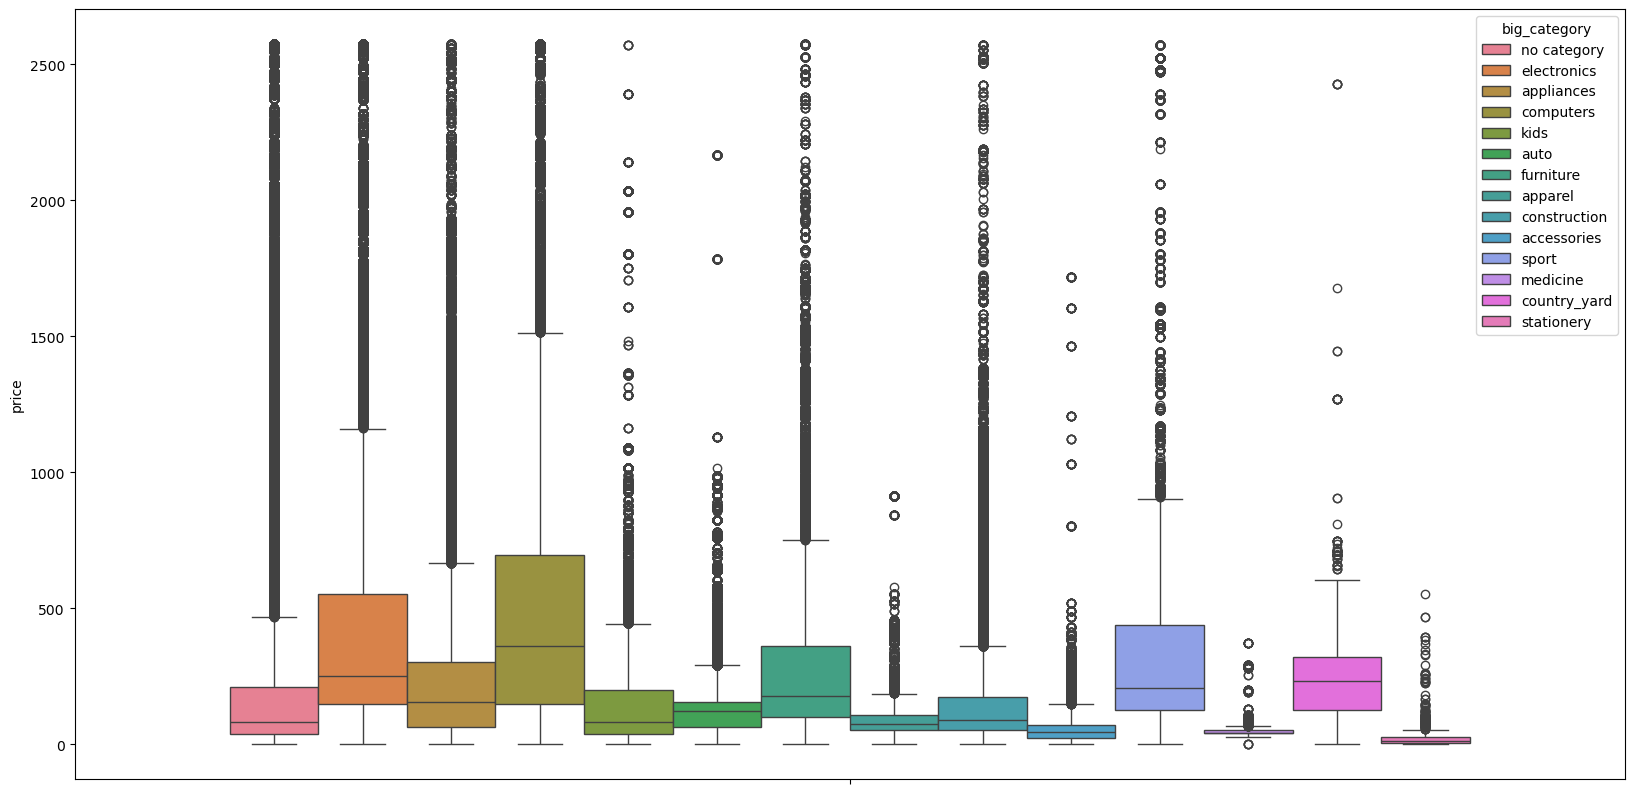

In [63]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, y='price',hue='big_category')
plt.show()

In [65]:
pd.get_dummies(data, columns=['big_category'])

,time,type,product_id,category_id,category_code,brand,price,user_id,user_session,two_stage_category,...,big_category_computers,big_category_construction,big_category_country_yard,big_category_electronics,big_category_furniture,big_category_kids,big_category_medicine,big_category_no category,big_category_sport,big_category_stationery
0,2019-10-04 00:00:00+00:00,view,23000129,2053013553459233053,no category,NaN,10.30,513841530,1cc02c3f-4416-4a84-aee4-1fffb59c7ada,no category,...,False,False,False,False,False,False,False,True,False,False
1,2019-10-04 00:00:00+00:00,view,1004536,2053013555631882655,electronics.smartphone,huawei,796.64,530393296,ad731471-2f54-4692-ab01-48d06f8e8f02,electronics/smartphone,...,False,False,False,True,False,False,False,False,False,False
2,2019-10-04 00:00:01+00:00,view,16000914,2053013558223962683,no category,NaN,20.59,551601664,4c2a6a39-6980-4cf0-8775-95c9ead3659b,no category,...,False,False,False,False,False,False,False,True,False,False
3,2019-10-04 00:00:02+00:00,view,22700088,2053013556168753601,no category,aeroforce,72.59,546578943,7d377287-33f6-44b8-a147-4b68cb9efd8d,no category,...,False,False,False,False,False,False,False,True,False,False
4,2019-10-04 00:00:02+00:00,view,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,556452834,5c1459a7-d7cf-4b21-a19d-3369e3a28f49,electronics/smartphone,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877477,2019-10-28 23:59:57+00:00,view,31300087,2053013558072967729,no category,pasabahce,4.09,553765446,2f84d97f-193a-710a-5c24-1ad9d918b8cf,no category,...,False,False,False,False,False,False,False,True,False,False
9877478,2019-10-28 23:59:57+00:00,view,26601226,2053013563517174627,no category,efremov,101.42,505176432,276566ac-5aa3-4ba2-b879-01edcdb65061,no category,...,False,False,False,False,False,False,False,True,False,False
9877479,2019-10-28 23:59:58+00:00,view,13300102,2053013557166998015,no category,vegas,505.29,516592330,a21fe242-f591-4ef3-942e-4dc6d2a6eb3c,no category,...,False,False,False,False,False,False,False,True,False,False
9877480,2019-10-28 23:59:58+00:00,view,1003304,2053013555631882655,electronics.smartphone,apple,591.78,546404834,af33882f-3f17-45c9-b85b-cde02ecced0e,electronics/smartphone,...,False,False,False,True,False,False,False,False,False,False


In [74]:
df_train, df_test = train_test_split(data, test_size=0.2)
x_train = df_train.drop(['price'],axis=1)
y_train = df_train['price']
x_test = df_test.drop(['price'],axis=1)
y_test = df_test['price']

col_to_scale = x_train.select_dtypes(include=['number']).columns.to_list()
scaler = StandardScaler()
x_train[col_to_scale] = scaler.fit_transform(x_train[col_to_scale])
x_test[col_to_scale] = scaler.transform(x_test[col_to_scale])

In [75]:
x_train.describe()

,product_id,category_id,user_id
count,7.901985e+06,7.901985e+06,7.901985e+06
mean,5.532613e-17,1.139350e-13,3.939959e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.063948e-01,-2.378052e-01,-1.888446e+01
25%,-8.060408e-01,-2.378050e-01,-9.549993e-01
50%,-4.593724e-01,-2.378050e-01,-2.070876e-01
75%,4.548559e-01,-2.378046e-01,9.782747e-01
max,4.230368e+00,6.404563e+00,1.710923e+00
